In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Caminho para o arquivo CSV
dataset_path = '../data/screentime_analysis.csv'

# Carregar o dataset
screentime_analysis_data = pd.read_csv(dataset_path)

# Primeiras linhas do dataset
screentime_analysis_data.head()


,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [3]:
# Verificação do tipo de dados
screentime_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [4]:
#Conversão de Date Object para DateTime

screentime_analysis_data['Date'] = pd.to_datetime(screentime_analysis_data['Date'])
screentime_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


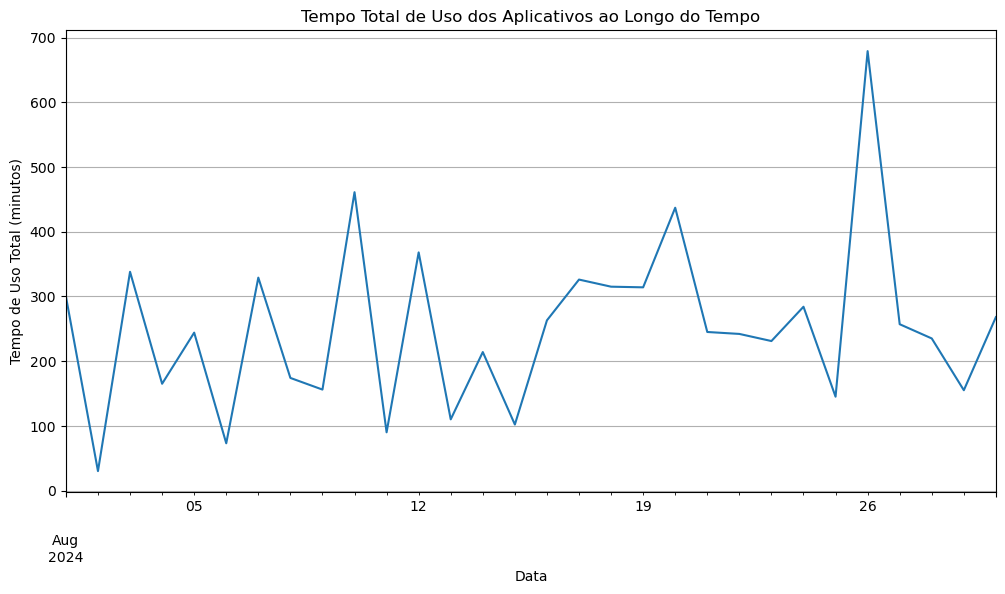

In [5]:
# Gráfico de tempo de uso total por dia
plt.figure(figsize=(12, 6))
screentime_analysis_data.groupby('Date')['Usage (minutes)'].sum().plot()
plt.title('Tempo Total de Uso dos Aplicativos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Tempo de Uso Total (minutos)')
plt.grid(True)
plt.show()


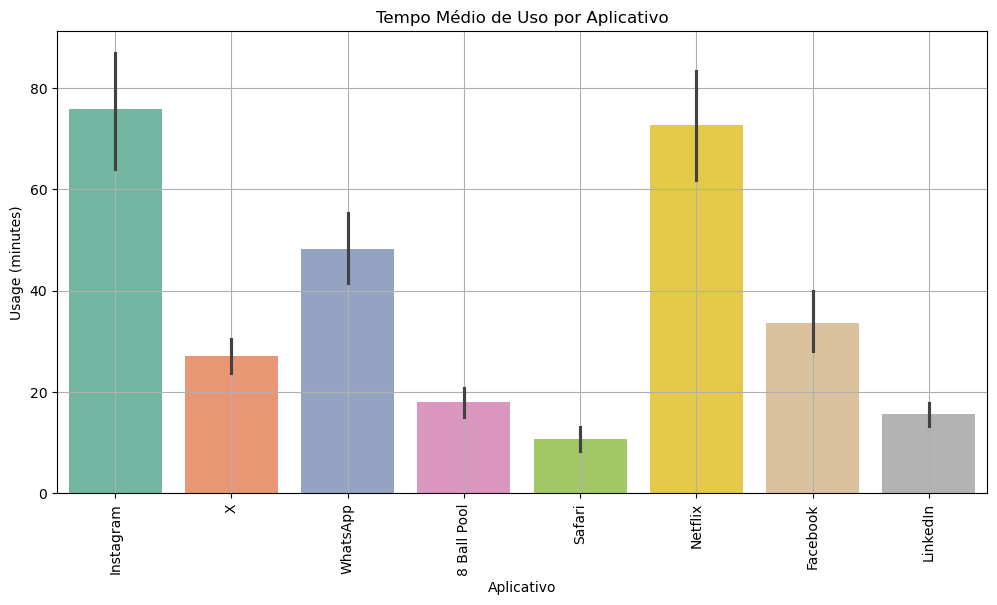

In [9]:

# Gráfico de Tempo Médio de Uso por Aplicativo
plt.figure(figsize=(12, 6))
sns.barplot(x='App', y='Usage (minutes)', data=screentime_analysis_data, estimator='mean', palette='Set2', hue='App')
plt.title('Tempo Médio de Uso por Aplicativo')
plt.xlabel('Aplicativo')
plt.xticks(rotation=90)
plt.grid(True)  # Corrigido de 'grind' para 'grid'
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

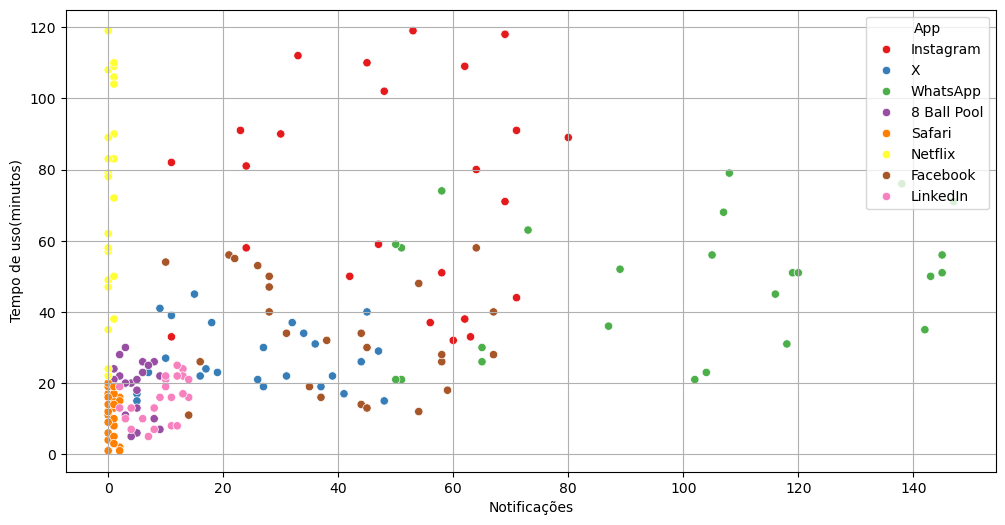

In [10]:
# Relação entre Notificação e Tempo de uso

plt.figure(figsize=(12,6))
sns.scatterplot(x='Notifications', y='Usage (minutes)', data=screentime_analysis_data, hue='App', palette='Set1')
plt.title = ('Correlação entre Notificações e Tempo de uso')
plt.xlabel('Notificações')
plt.ylabel('Tempo de uso(minutos)')
plt.grid(True)
plt.show

In [12]:
app_summary = screentime_analysis_data.groupby('App').agg({
    'Usage (minutes)': 'mean',
    'Notifications': 'mean',
    'Times Opened': 'mean',
}).reset_index()  # Corrigido para reset_index()

print(app_summary)


           App  Usage (minutes)  Notifications  Times Opened
0  8 Ball Pool            18.08           4.52          7.28
1     Facebook            33.68          39.72         30.20
2    Instagram            75.92          49.80         41.56
3     LinkedIn            15.60           8.92          4.76
4      Netflix            72.76           0.44          2.56
5       Safari            10.80           0.72          5.28
6     WhatsApp            48.16          99.92         68.24
7            X            27.00          25.84         13.16
